In [1]:
import pandas as pd
import numpy as np
import joblib
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM

2025-07-01 11:08:29.486666: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-07-01 11:08:29.486699: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
X_train = joblib.load('../../preprocessed_data/CICIDS/X_train.joblib')
X_test = joblib.load('../../preprocessed_data/CICIDS/X_test.joblib')
Y_train = joblib.load('../../preprocessed_data/CICIDS/Y_train.joblib')
Y_test = joblib.load('../../preprocessed_data/CICIDS/Y_test.joblib')

### CNN training

In [3]:
CNN_model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    Conv1D(32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2), # keep the maximum each 2 values (divide by 2 the number of values)
    Dropout(0.3), # disable 30% of neurons => reduce overfitting
    Flatten(), # transform the structure from 3D to 2D
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid') # binary output (0=normal or 1=attack)
])

CNN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

CNN_model.summary()

history = CNN_model.fit(X_train, Y_train, epochs=5, batch_size=64, validation_data=(X_test, Y_test))

2025-07-01 11:08:31.856803: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2025-07-01 11:08:31.856867: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2025-07-01 11:08:31.856896: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (bossantm-Lenov-Pro5): /proc/driver/nvidia/version does not exist
2025-07-01 11:08:31.857117: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 67, 32)            128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 33, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 33, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1056)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                67648     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

2025-07-01 11:08:32.226017: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 215474304 exceeds 10% of free system memory.
2025-07-01 11:08:32.499277: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
12172/12199 [============================>.] - ETA: 0s - loss: 0.1812 - accuracy: 0.9235

2025-07-01 11:08:55.178243: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 92346288 exceeds 10% of free system memory.


12199/12199 [==============================] - 26s 2ms/step - loss: 0.1811 - accuracy: 0.9236 - val_loss: 0.1325 - val_accuracy: 0.9418
Epoch 2/5
12199/12199 [==============================] - 26s 2ms/step - loss: 0.1415 - accuracy: 0.9430 - val_loss: 0.1198 - val_accuracy: 0.9495
Epoch 3/5
12199/12199 [==============================] - 26s 2ms/step - loss: 0.1286 - accuracy: 0.9495 - val_loss: 0.1038 - val_accuracy: 0.9628
Epoch 4/5
12199/12199 [==============================] - 25s 2ms/step - loss: 0.1198 - accuracy: 0.9545 - val_loss: 0.0959 - val_accuracy: 0.9654
Epoch 5/5
12199/12199 [==============================] - 26s 2ms/step - loss: 0.1123 - accuracy: 0.9578 - val_loss: 0.0894 - val_accuracy: 0.9684


### LSTM training

In [4]:
LSTM_model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

LSTM_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

LSTM_model.summary()


history = LSTM_model.fit(X_train, Y_train, epochs=5, batch_size=64, validation_data=(X_test, Y_test))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 21,121
Trainable params: 21,121
Non-trainable params: 0
_________________________________________________________________


2025-07-01 11:10:42.491305: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 215474304 exceeds 10% of free system memory.


Epoch 1/5
12199/12199 [==============================] - ETA: 0s - loss: 0.2420 - accuracy: 0.8950

2025-07-01 11:14:19.543813: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 92346288 exceeds 10% of free system memory.


12199/12199 [==============================] - 246s 20ms/step - loss: 0.2420 - accuracy: 0.8950 - val_loss: 0.1738 - val_accuracy: 0.9360
Epoch 2/5
12199/12199 [==============================] - 247s 20ms/step - loss: 0.1762 - accuracy: 0.9281 - val_loss: 0.1547 - val_accuracy: 0.9356
Epoch 3/5
12199/12199 [==============================] - 246s 20ms/step - loss: 0.1544 - accuracy: 0.9387 - val_loss: 0.1387 - val_accuracy: 0.9406
Epoch 4/5
12199/12199 [==============================] - 246s 20ms/step - loss: 0.1376 - accuracy: 0.9470 - val_loss: 0.1196 - val_accuracy: 0.9588
Epoch 5/5
12199/12199 [==============================] - 246s 20ms/step - loss: 0.1186 - accuracy: 0.9573 - val_loss: 0.1084 - val_accuracy: 0.9630


### AE-LSTM

In [5]:
input_dim = X_train.shape[1]  # n_features

# encoder
inputs = Input(shape=(input_dim, 1))
encoded = LSTM(64, return_sequences=False)(inputs)
encoded = Dense(32, activation='relu')(encoded)

# classifier
x = Dropout(0.3)(encoded)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

AE_LSTM_model = Model(inputs, output)

AE_LSTM_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
AE_LSTM_model.summary()


history = AE_LSTM_model.fit(X_train, Y_train, epochs=5, batch_size=64, validation_data=(X_test, Y_test)
)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 69, 1)]           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65    

2025-07-01 11:31:14.914872: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 215474304 exceeds 10% of free system memory.


Epoch 1/5
12199/12199 [==============================] - 250s 20ms/step - loss: 0.2698 - accuracy: 0.8762 - val_loss: 0.1851 - val_accuracy: 0.9223
Epoch 2/5
12199/12199 [==============================] - 247s 20ms/step - loss: 0.1868 - accuracy: 0.9209 - val_loss: 0.1674 - val_accuracy: 0.9281
Epoch 3/5
12199/12199 [==============================] - 246s 20ms/step - loss: 0.1633 - accuracy: 0.9319 - val_loss: 0.1339 - val_accuracy: 0.9589
Epoch 4/5
12199/12199 [==============================] - 249s 20ms/step - loss: 0.1275 - accuracy: 0.9516 - val_loss: 0.1087 - val_accuracy: 0.9645
Epoch 5/5
12199/12199 [==============================] - 252s 21ms/step - loss: 0.1054 - accuracy: 0.9628 - val_loss: 0.0947 - val_accuracy: 0.9676


In [6]:
CNN_model.save("../../models/cnn_CICIDS2017_model.keras")
LSTM_model.save("../../models/lstm_CICIDS2017_model.keras")
AE_LSTM_model.save("../../models/ae-lstm_CICIDS2017_model.keras")

In [7]:
file_name_cnn = '../../models/cnn_CICIDS2017.pkl' 
joblib.dump(CNN_model, file_name_cnn) 

file_name_lstm = '../../models/lstm_CICIDS2017.pkl' 
joblib.dump(LSTM_model, file_name_lstm) 

file_name_ae_lstm = '../../models/ae-lstm_CICIDS2017.pkl' 
joblib.dump(AE_LSTM_model, file_name_ae_lstm)

TypeError: cannot pickle 'weakref' object

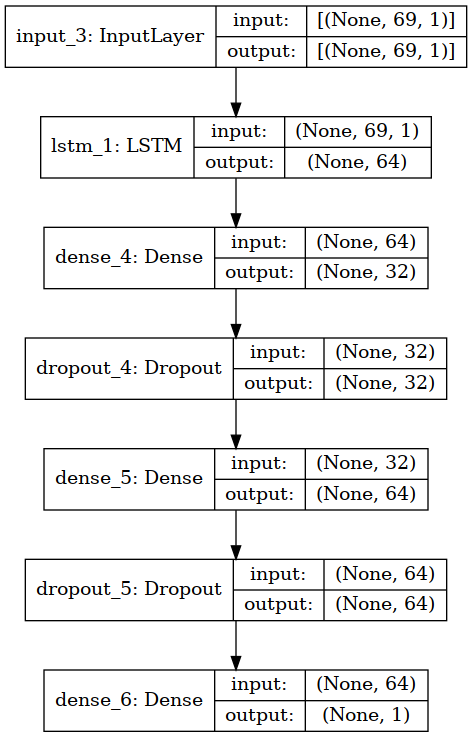

In [8]:
from tensorflow.keras.utils import plot_model

from keras.models import load_model

cnn_loaded = load_model('../../models/cnn_CICIDS2017_model.keras')
lstm_loaded = load_model('../../models/lstm_CICIDS2017_model.keras')
ae_lstm_loaded = load_model('../../models/ae-lstm_CICIDS2017_model.keras')

plot_model(cnn_loaded, to_file='../../results/CICIDS/CNN_model.png', show_shapes=True, show_layer_names=True)
plot_model(lstm_loaded, to_file='../../results/CICIDS/LSTM_model.png', show_shapes=True, show_layer_names=True)
plot_model(ae_lstm_loaded, to_file='../../results/CICIDS/AE-LSTM_model.png', show_shapes=True, show_layer_names=True)

### CNN metrics

              precision    recall  f1-score   support

      Normal       0.98      0.96      0.97    167294
     Attacks       0.96      0.98      0.97    167294

    accuracy                           0.97    334588
   macro avg       0.97      0.97      0.97    334588
weighted avg       0.97      0.97      0.97    334588

Test Loss: 0.0894
Test Accuracy: 0.9684


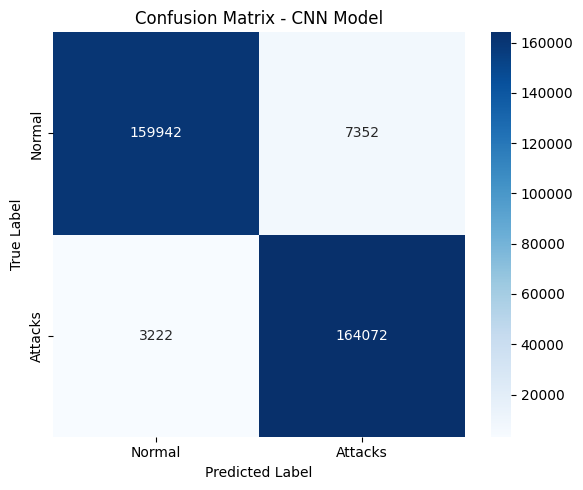

Attacks detected (True Positive) : 164072
Normal traffic detected (True Negative) : 159942
Attacks missed (False Negative) : 3222
False alarms (False Positive) : 7352


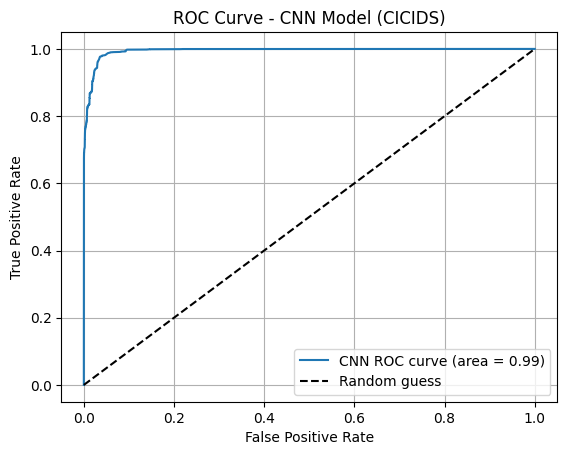

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_prob = CNN_model.predict(X_test)


y_pred = (y_pred_prob > 0.5).astype("int32")

# (precision, recall, F1-score)
print(classification_report(Y_test, y_pred, labels=[0,1], target_names=["Normal", "Attacks"]))

# Accuracy and loss
loss, accuracy = CNN_model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# confusion Matrix
cm = confusion_matrix(Y_test, y_pred, labels=[0,1],)
labels = ["Normal", "Attacks"]
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - CNN Model')
plt.tight_layout()
plt.savefig("../../results/CICIDS/CNN_matrix.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# displaying the attack number
tn, fp, fn, tp = cm.ravel()
print(f"Attacks detected (True Positive) : {tp}")
print(f"Normal traffic detected (True Negative) : {tn}")
print(f"Attacks missed (False Negative) : {fn}")
print(f"False alarms (False Positive) : {fp}")

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'CNN ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CNN Model (CICIDS)')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig("../../results/CICIDS/CNN_ROC_curve.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()


### LSTM metrics

              precision    recall  f1-score   support

      Normal       0.99      0.94      0.96    167294
     Attacks       0.94      0.99      0.96    167294

    accuracy                           0.96    334588
   macro avg       0.96      0.96      0.96    334588
weighted avg       0.96      0.96      0.96    334588

Test Loss: 0.1084
Test Accuracy: 0.9630


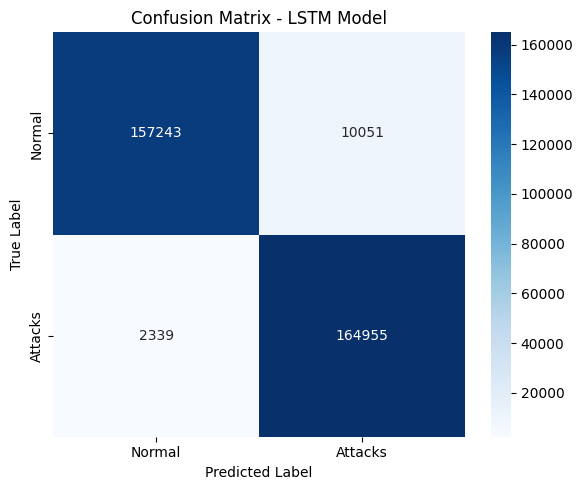

Attacks detected (True Positive) : 164955
Normal traffic detected (True Negative) : 157243
Attacks missed (False Negative) : 2339
False alarms (False Positive) : 10051


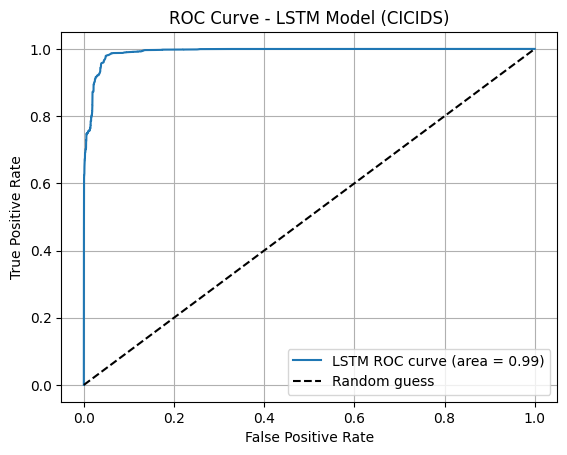

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_prob = LSTM_model.predict(X_test)


y_pred = (y_pred_prob > 0.5).astype("int32")

# (precision, recall, F1-score)
print(classification_report(Y_test, y_pred, labels=[0,1], target_names=["Normal", "Attacks"]))

# Accuracy and loss
loss, accuracy = LSTM_model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# confusion Matrix
cm = confusion_matrix(Y_test, y_pred, labels=[0,1],)
labels = ["Normal", "Attacks"]
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - LSTM Model')
plt.tight_layout()
plt.savefig("../../results/CICIDS/LSTM_matrix.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# displaying the attack number
tn, fp, fn, tp = cm.ravel()
print(f"Attacks detected (True Positive) : {tp}")
print(f"Normal traffic detected (True Negative) : {tn}")
print(f"Attacks missed (False Negative) : {fn}")
print(f"False alarms (False Positive) : {fp}")

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'LSTM ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LSTM Model (CICIDS)')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig("../../results/CICIDS/LSTM_ROC_curve.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()


### AE-LSTM metrics

              precision    recall  f1-score   support

      Normal       0.98      0.95      0.97    167294
     Attacks       0.95      0.98      0.97    167294

    accuracy                           0.97    334588
   macro avg       0.97      0.97      0.97    334588
weighted avg       0.97      0.97      0.97    334588

Test Loss: 0.0947
Test Accuracy: 0.9676


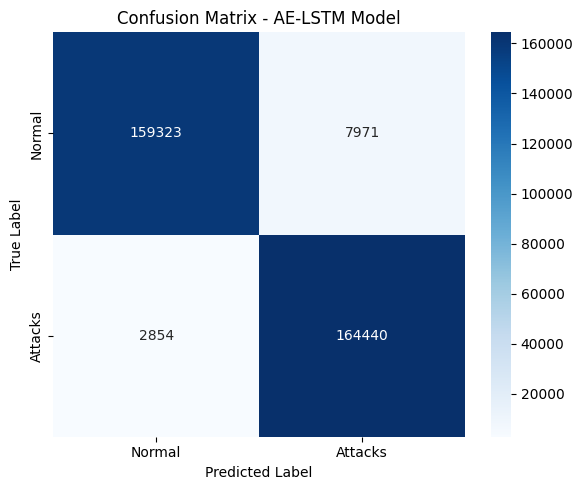

Attacks detected (True Positive) : 164440
Normal traffic detected (True Negative) : 159323
Attacks missed (False Negative) : 2854
False alarms (False Positive) : 7971


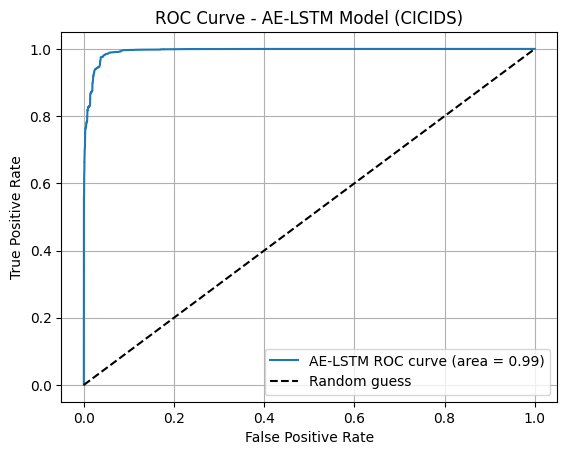

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_prob = AE_LSTM_model.predict(X_test)


y_pred = (y_pred_prob > 0.5).astype("int32")

# (precision, recall, F1-score)
print(classification_report(Y_test, y_pred, labels=[0,1], target_names=["Normal", "Attacks"]))

# Accuracy and loss
loss, accuracy = AE_LSTM_model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# confusion Matrix
cm = confusion_matrix(Y_test, y_pred, labels=[0,1],)
labels = ["Normal", "Attacks"]
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - AE-LSTM Model')
plt.tight_layout()
plt.savefig("../../results/CICIDS/AE-LSTM_matrix.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# displaying the attack number
tn, fp, fn, tp = cm.ravel()
print(f"Attacks detected (True Positive) : {tp}")
print(f"Normal traffic detected (True Negative) : {tn}")
print(f"Attacks missed (False Negative) : {fn}")
print(f"False alarms (False Positive) : {fp}")

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'AE-LSTM ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AE-LSTM Model (CICIDS)')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig("../../results/CICIDS/AE-LSTM_ROC_curve.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()
